<a href="https://colab.research.google.com/github/lukasgala19/Zadanie_LG/blob/main/Zadanie_LG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import locale

In [3]:
Transactions = pd.read_excel('Data.xlsx',sheet_name=0)

In [4]:
print(Transactions)

     Transaction ID       Date               Product name  Quantity
0                 1 2022-02-01           Samsung QN55Q80T         1
1                 1 2022-02-01        Apple iPhone 12 Pro         1
2                 2 2022-02-02         Lenovo Tab P11 Pro         2
3                 2 2022-02-02         Xiaomi Poco X3 Pro         1
4                 3 2022-02-03  Bose QuietComfort Earbuds         2
..              ...        ...                        ...       ...
136              77 2022-05-27                LG 75NANO81         1
137              77 2022-05-27     Samsung Galaxy Tab S7+         1
138              78 2022-05-29  Bose QuietComfort Earbuds         2
139              78 2022-05-29        Apple iPhone 12 Pro         1
140              78 2022-05-29                LG OLED55CX         1

[141 rows x 4 columns]


In [5]:
Products = pd.read_excel('Data.xlsx',sheet_name=1)

In [6]:
print(Products)

                 Product name          Category  Price
0                JBL Charge 4             Audio   2990
1   Bose QuietComfort Earbuds             Audio   7490
2             Sony WH-1000XM4             Audio  10490
3                 LG OLED55CX          Televize  38990
4            Samsung QN55Q80T          Televize  29990
5                 LG 75NANO81          Televize  44990
6         Apple iPhone 12 Pro  Mobilní telefony  27990
7    Samsung Galaxy S21 Ultra  Mobilní telefony  25490
8          Xiaomi Poco X3 Pro  Mobilní telefony   5690
9              Apple iPad Air           Tablety  17990
10     Samsung Galaxy Tab S7+           Tablety  24990
11         Lenovo Tab P11 Pro           Tablety  11990


In [7]:
spojene_df = pd.merge(Transactions,Products,on='Product name')

In [8]:
print(spojene_df.head)

<bound method NDFrame.head of      Transaction ID       Date               Product name  Quantity  \
0                 1 2022-02-01           Samsung QN55Q80T         1   
1                 1 2022-02-01        Apple iPhone 12 Pro         1   
2                 2 2022-02-02         Lenovo Tab P11 Pro         2   
3                 2 2022-02-02         Xiaomi Poco X3 Pro         1   
4                 3 2022-02-03  Bose QuietComfort Earbuds         2   
..              ...        ...                        ...       ...   
136              77 2022-05-27                LG 75NANO81         1   
137              77 2022-05-27     Samsung Galaxy Tab S7+         1   
138              78 2022-05-29  Bose QuietComfort Earbuds         2   
139              78 2022-05-29        Apple iPhone 12 Pro         1   
140              78 2022-05-29                LG OLED55CX         1   

             Category  Price  
0            Televize  29990  
1    Mobilní telefony  27990  
2             Tablety  1

In [9]:
print(spojene_df.iloc[105])

Transaction ID                     64
Date              2022-04-23 00:00:00
Product name       Xiaomi Poco X3 Pro
Quantity                            1
Category             Mobilní telefony
Price                            5690
Name: 105, dtype: object


In [10]:
print(spojene_df[spojene_df["Category"].isna()])

Empty DataFrame
Columns: [Transaction ID, Date, Product name, Quantity, Category, Price]
Index: []


In [11]:
spojene_df["Product Revenue"] = spojene_df["Price"] * spojene_df["Quantity"]

In [12]:
spojene_df["Month"] = spojene_df["Date"].dt.strftime('%B')

In [13]:
print(spojene_df.head)

<bound method NDFrame.head of      Transaction ID       Date               Product name  Quantity  \
0                 1 2022-02-01           Samsung QN55Q80T         1   
1                 1 2022-02-01        Apple iPhone 12 Pro         1   
2                 2 2022-02-02         Lenovo Tab P11 Pro         2   
3                 2 2022-02-02         Xiaomi Poco X3 Pro         1   
4                 3 2022-02-03  Bose QuietComfort Earbuds         2   
..              ...        ...                        ...       ...   
136              77 2022-05-27                LG 75NANO81         1   
137              77 2022-05-27     Samsung Galaxy Tab S7+         1   
138              78 2022-05-29  Bose QuietComfort Earbuds         2   
139              78 2022-05-29        Apple iPhone 12 Pro         1   
140              78 2022-05-29                LG OLED55CX         1   

             Category  Price  Product Revenue     Month  
0            Televize  29990            29990  February  
1

In [14]:
total_product_revenue_by_category = spojene_df.groupby("Category")["Product Revenue"].sum().reset_index()

In [15]:
print(total_product_revenue_by_category)

           Category  Product Revenue
0             Audio           416370
1  Mobilní telefony           614460
2           Tablety           623660
3          Televize          1205680


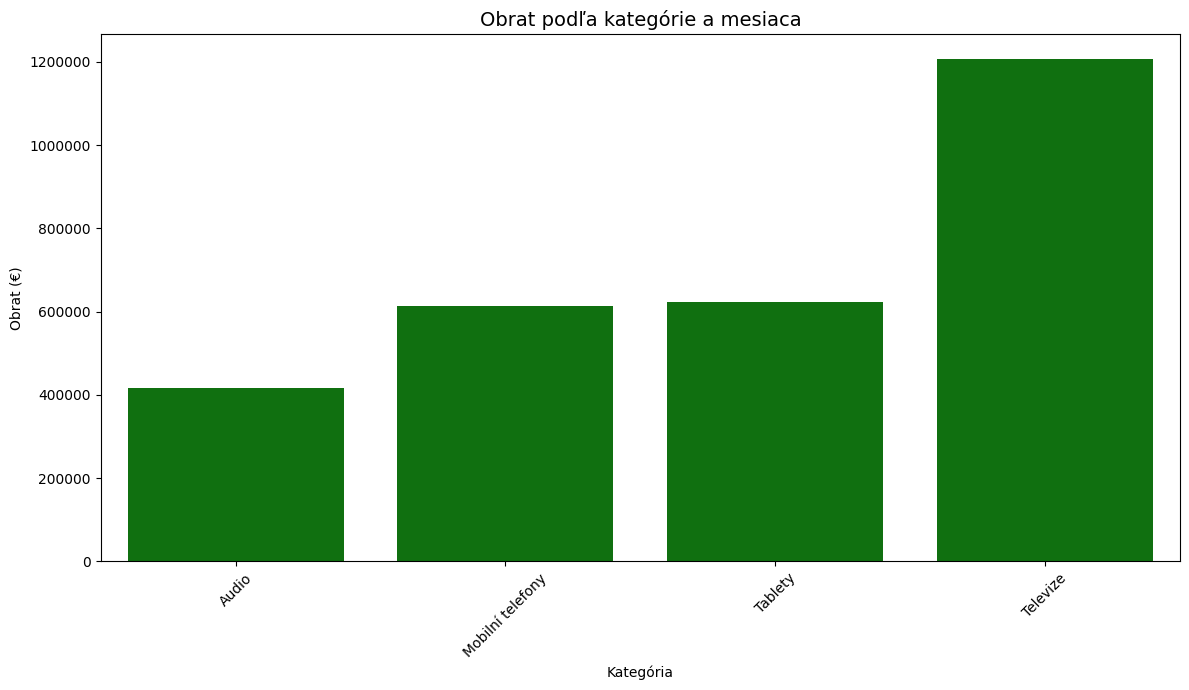

In [16]:
plt.figure(figsize=(12, 7))
sns.barplot(data=total_product_revenue_by_category, x="Category", y="Product Revenue",color="green")
plt.title("Obrat podľa kategórie a mesiaca", fontsize=14)
plt.xlabel("Kategória")
plt.ylabel("Obrat (€)")
plt.xticks(rotation=45)
# 👉 Zmeniť z vedeckého zápisu (1e6) na normálne čísla
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

In [17]:
total_produt_revenue_by_category_month = spojene_df.groupby(["Category", "Month"])["Product Revenue"].sum().reset_index()

In [18]:
print(total_produt_revenue_by_category_month)

            Category     Month  Product Revenue
0              Audio     April           107840
1              Audio  February           130310
2              Audio     March           107820
3              Audio       May            70400
4   Mobilní telefony     April           177510
5   Mobilní telefony  February           208690
6   Mobilní telefony     March           157710
7   Mobilní telefony       May            70550
8            Tablety     April           171910
9            Tablety  February           188890
10           Tablety     March           164910
11           Tablety       May            97950
12          Televize     April           266930
13          Televize  February           290920
14          Televize     March           380900
15          Televize       May           266930


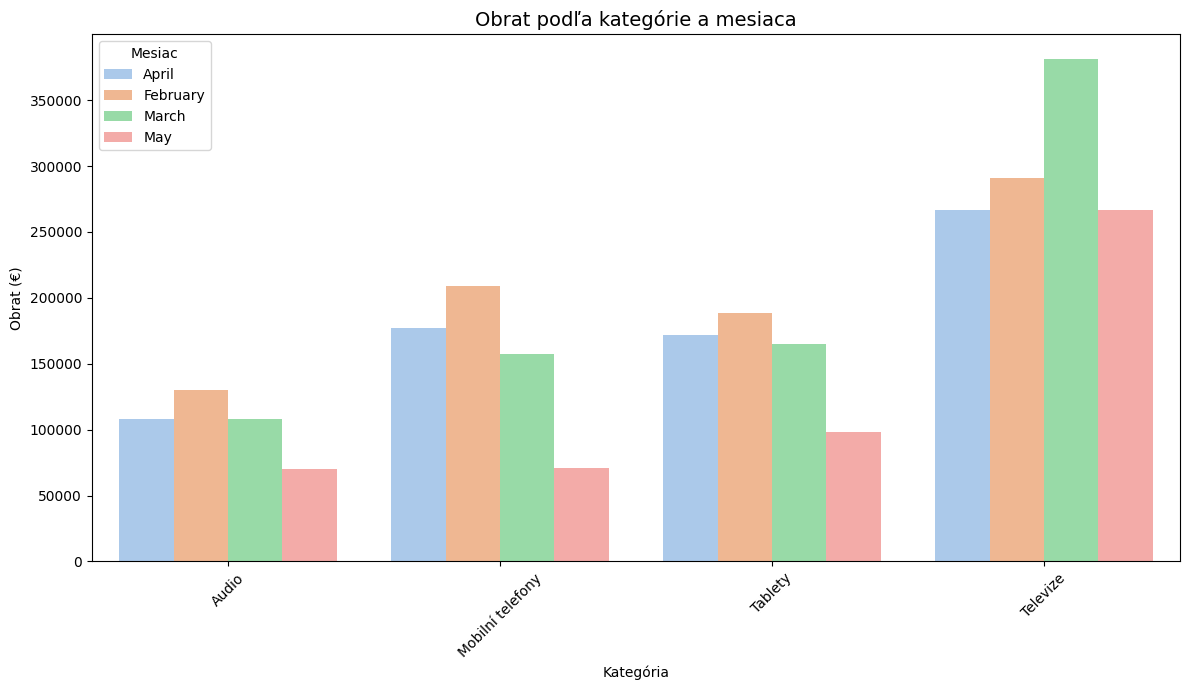

In [19]:
plt.figure(figsize=(12, 7))
sns.barplot(data=total_produt_revenue_by_category_month, x="Category", y="Product Revenue", hue="Month", palette="pastel")

plt.title("Obrat podľa kategórie a mesiaca", fontsize=14)
plt.xlabel("Kategória")
plt.ylabel("Obrat (€)")
plt.xticks(rotation=45)
plt.legend(title="Mesiac")
plt.tight_layout()
plt.show()

###Uloha 2###

In [20]:
spojene_df["Day of week"] = spojene_df["Date"].dt.day_name()

In [21]:
print(spojene_df.head)

<bound method NDFrame.head of      Transaction ID       Date               Product name  Quantity  \
0                 1 2022-02-01           Samsung QN55Q80T         1   
1                 1 2022-02-01        Apple iPhone 12 Pro         1   
2                 2 2022-02-02         Lenovo Tab P11 Pro         2   
3                 2 2022-02-02         Xiaomi Poco X3 Pro         1   
4                 3 2022-02-03  Bose QuietComfort Earbuds         2   
..              ...        ...                        ...       ...   
136              77 2022-05-27                LG 75NANO81         1   
137              77 2022-05-27     Samsung Galaxy Tab S7+         1   
138              78 2022-05-29  Bose QuietComfort Earbuds         2   
139              78 2022-05-29        Apple iPhone 12 Pro         1   
140              78 2022-05-29                LG OLED55CX         1   

             Category  Price  Product Revenue     Month Day of week  
0            Televize  29990            29990  

In [22]:
orders_per_day = spojene_df.groupby("Day of week").size().sort_values(ascending=False)
print(orders_per_day)

# Deň s najviac objednávkami:
print("Nejsilnější den v týdnu na počet objednávek je:", orders_per_day.idxmax())

Day of week
Saturday     29
Monday       25
Wednesday    22
Friday       20
Tuesday      16
Thursday     15
Sunday       14
dtype: int64
Nejsilnější den v týdnu na počet objednávek je: Saturday


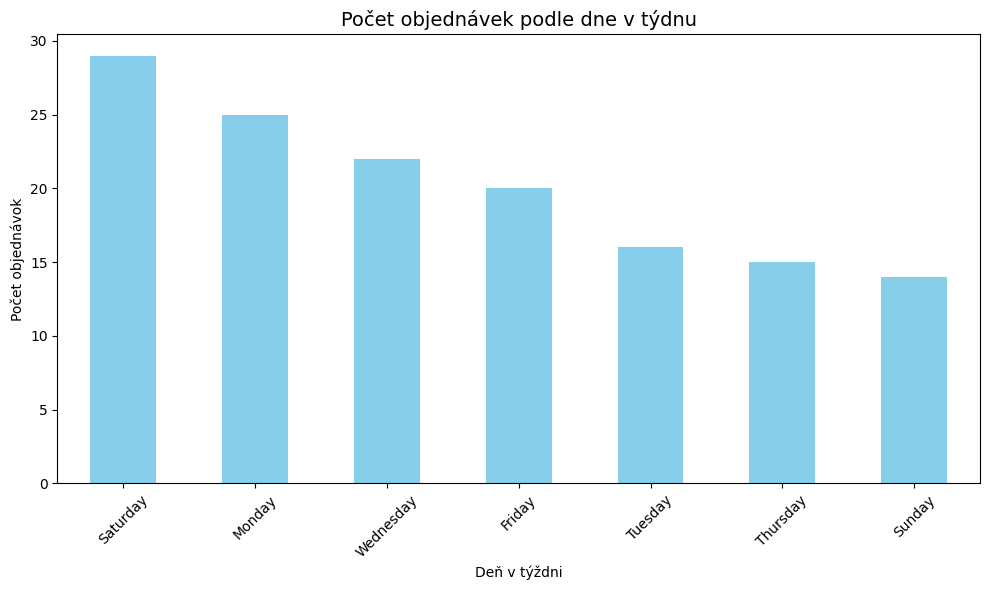

In [35]:
# Vykreslenie grafu
plt.figure(figsize=(10, 6))
orders_per_day.plot(kind="bar", color="skyblue")

plt.title("Počet objednávek podle dne v týdnu", fontsize=14)
plt.xlabel("Deň v týždni")
plt.ylabel("Počet objednávok")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###Úloha 3###

In [25]:
# 1. Vyfiltruj ID objednávok, kde sa vyskytuje Televize
tv_orders = spojene_df[spojene_df["Category"] == "Televize"]["Transaction ID"].unique()

# 2. Vyfiltruj všetky produkty, ktoré boli súčasťou týchto objednávok
products_in_same_orders = spojene_df[spojene_df["Transaction ID"].isin(tv_orders)]

# 3. Získaj zoznam kategórií (aj opakujúcich sa)
category_counts = products_in_same_orders["Category"].value_counts()

# 4. Odstráň samotnú „Televize“, lebo nás zaujímajú ostatné kategórie
category_counts = category_counts.drop("Televize", errors="ignore")

# 5. Výpis
print(category_counts)

Category
Audio               13
Mobilní telefony    12
Tablety              7
Name: count, dtype: int64


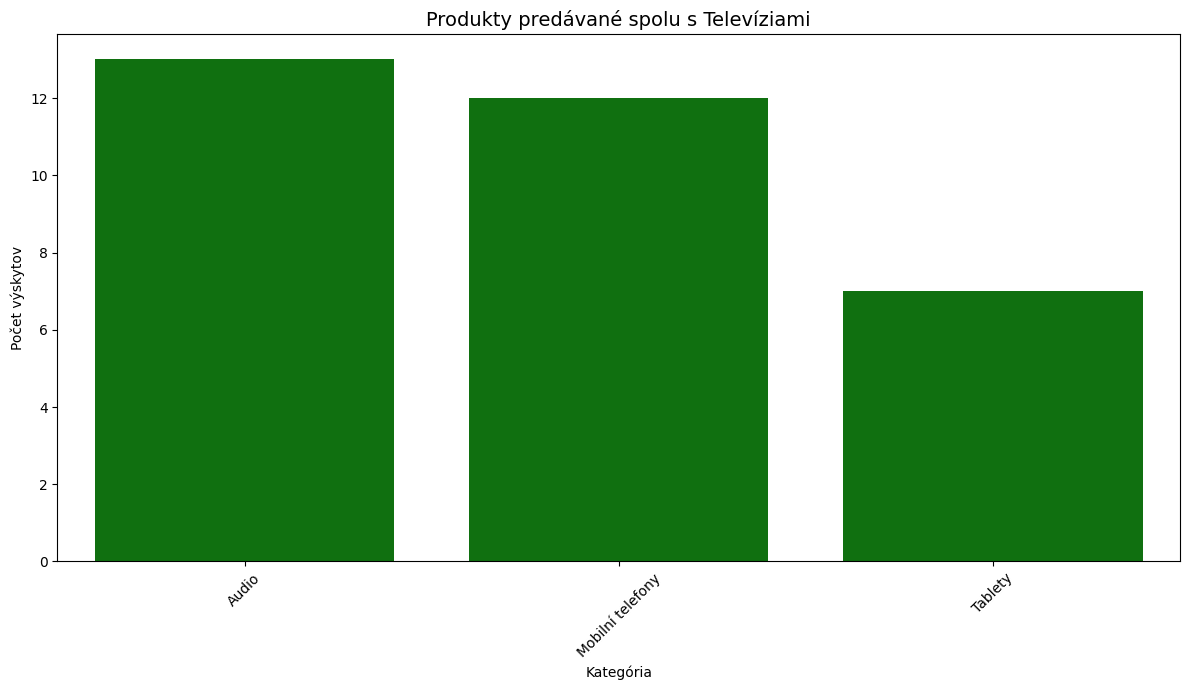

In [34]:
category_counts_df = category_counts.reset_index()
category_counts_df.columns = ["Category", "Count"]

# Vykreslenie grafu
plt.figure(figsize=(12, 7))
sns.barplot(data=category_counts_df, x="Category", y="Count", color="green")

plt.title("Produkty predávané spolu s Televíziami", fontsize=14)
plt.xlabel("Kategória")
plt.ylabel("Počet výskytov")
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

###4. Úloha

In [44]:
# 5. Rozdelenie na obdobia pred a po 18. 3. 2022
cutoff = pd.to_datetime("2022-03-18")
spojene_df["Period"] = spojene_df["Date"].apply(lambda x: "After" if x > cutoff else "Before")

# 6. Groupby – počet transakcií, celkové tržby a priemer na transakciu
result = spojene_df.groupby("Period")["Product Revenue"].agg(
    Transactions="size",
    Total_Revenue="sum",
    Avg_Revenue=lambda x: round(x.mean())
)

print(result)

        Transactions  Total_Revenue  Avg_Revenue
Period                                          
After             75        1538530        20514
Before            66        1321640        20025


In [45]:
result_reset = result.reset_index()
print(result_reset)


   Period  Transactions  Total_Revenue  Avg_Revenue
0   After            75        1538530        20514
1  Before            66        1321640        20025


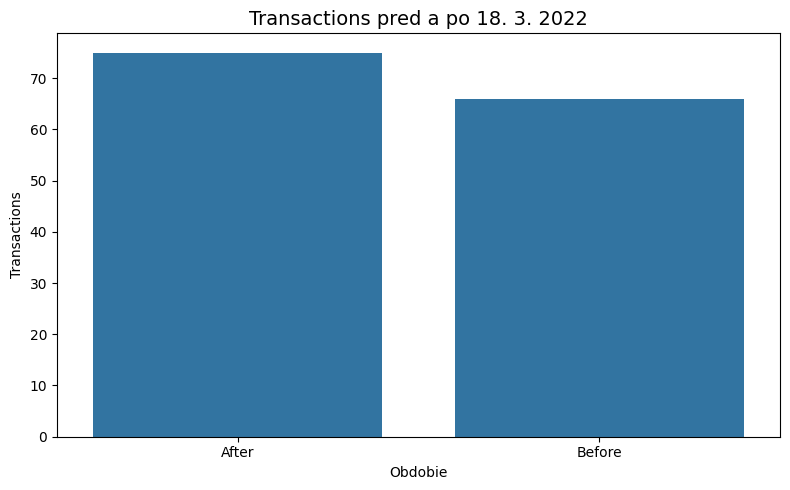

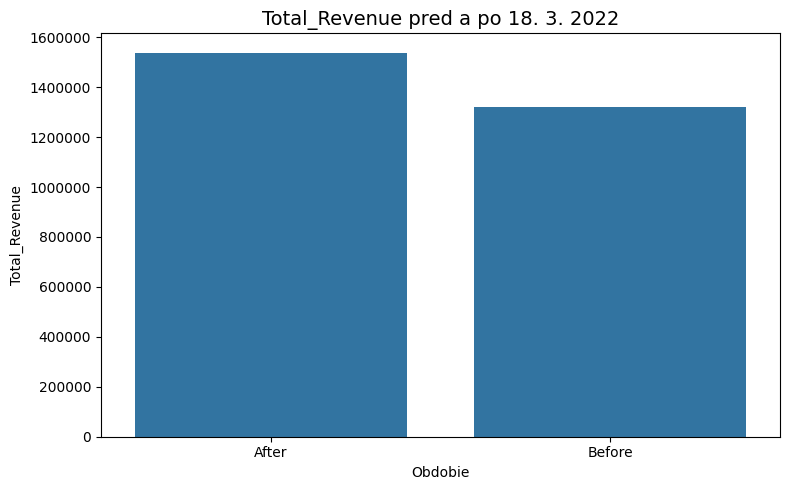

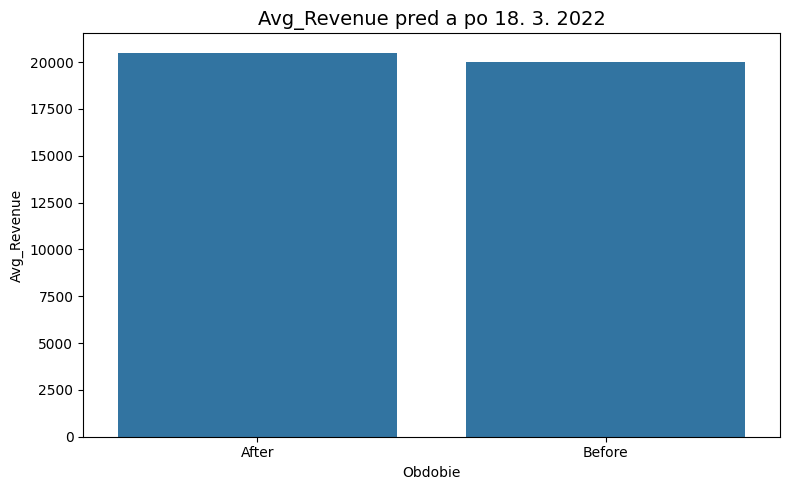

In [48]:
metrics = ["Transactions", "Total_Revenue", "Avg_Revenue"]

for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.barplot(data=result_reset, x="Period", y=metric)
    plt.title(f"{metric} pred a po 18. 3. 2022", fontsize=14)
    plt.xlabel("Obdobie")
    plt.ylabel(metric)
    plt.ticklabel_format(style='plain', axis='y')  # žiadny vedecký zápis na y osi
    plt.tight_layout()
    plt.show()